# Proyecto Properati

## Analisis de datos

---

<br />
<br />

Algunos datos que me ayudarían a trabajar sobre el problema considero que serían:

1. Ubicación de la propiedad.
2. Tipo de propiedad
3. Metros cuadrados que conforman la propiedad.
4. Número de ambientes.
5. Número de baños.
6. Si posee o no estacionamiento.
7. Accesibilidad (Colectivos, subte, tren,...)
8. Cercanías.

Considero que estos datos ayudarian a crear un modelo para predecir precios de inmuebles, en orden de importancia, ya que son los factores principales en los cuales las personas se fijan tanto para vender un inmueble como para alquilarlo
<br />
<br />

---

## Carga de libreria y dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_propiedades = pd.read_csv("C:/Users/Lucas/Desktop/ACAMICA/Properti.csv") #decimal=","
df_propiedades['index'] = df_propiedades.index  
df_propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,index
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,2
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,4


In [79]:
df_propiedades=df_propiedades.drop(columns=['lat', 'lon','l1'])


## Renombro columnas para que quede mas claro

In [80]:
df_propiedades.rename(columns={'l2':'Zona',
                        'l3':'Barrio'},
               inplace=True)

## Vemos las columnas

In [81]:
df_propiedades.columns

Index(['start_date', 'end_date', 'created_on', 'Zona', 'Barrio', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'title', 'description', 'property_type', 'operation_type',
       'index'],
      dtype='object')

## Vemos cuantas instancias y columnas tiene el dataset

In [82]:
df_propiedades.shape

(146660, 17)

## Vemos los faltantes que tiene el dataset por columna

In [83]:
df_propiedades.isna().sum()


start_date             0
end_date               0
created_on             0
Zona                   0
Barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
index                  0
dtype: int64

## Vemos la correlacion entre las variables

In [9]:
corr_inicial =df_propiedades.corr()

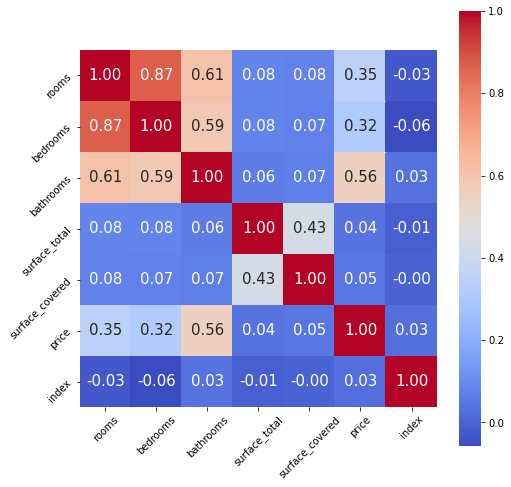

In [10]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr_inicial, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


### En este grafico podemos ver que las variables no tienen altos coeficientes de correlacion en general, la mas alta es de 0.87 entre rooms y bedrooms

## Agrupamos por zonas y barrio

In [11]:
dfzona = df_propiedades.groupby("Zona")["index"].count()
print(dfzona)

Zona
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Oeste    12666
Bs.As. G.B.A. Zona Sur      17173
Capital Federal             92539
Name: index, dtype: int64


In [12]:
df_propiedades.groupby('Barrio')['index'].count()

Barrio
Abasto               462
Agronomía            165
Almagro             7527
Almirante Brown     1228
Avellaneda          1370
                    ... 
Villa Riachuelo       42
Villa Santa Rita     354
Villa Soldati         69
Villa Urquiza       3339
Villa del Parque    1361
Name: index, Length: 89, dtype: int64

## Grafico Zona y Barrio

<AxesSubplot:ylabel='index'>

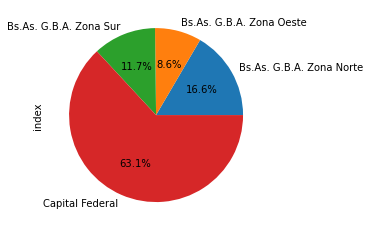

In [13]:
dfzona.plot.pie(autopct="%.1f%%")

### En el grafico se puede observar que mas del 60% de inmuebles se encuentren en Capital Federal

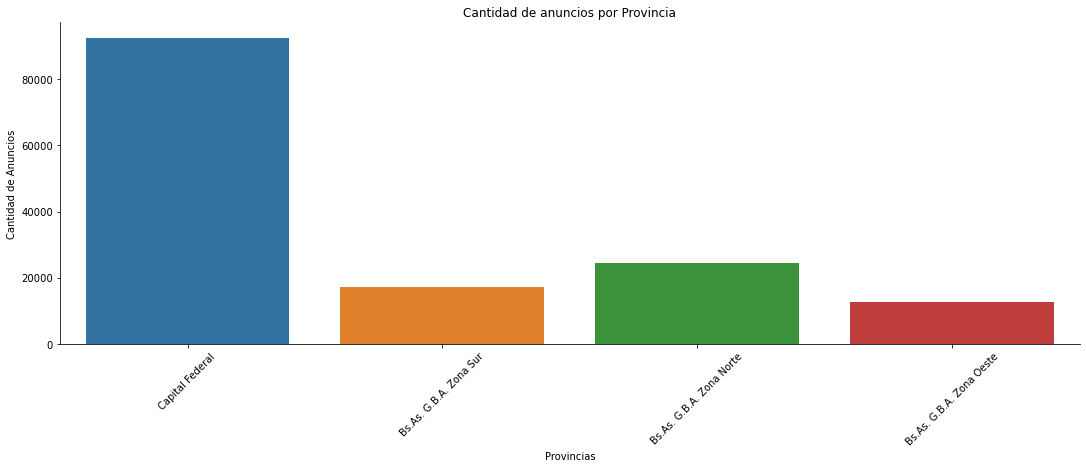

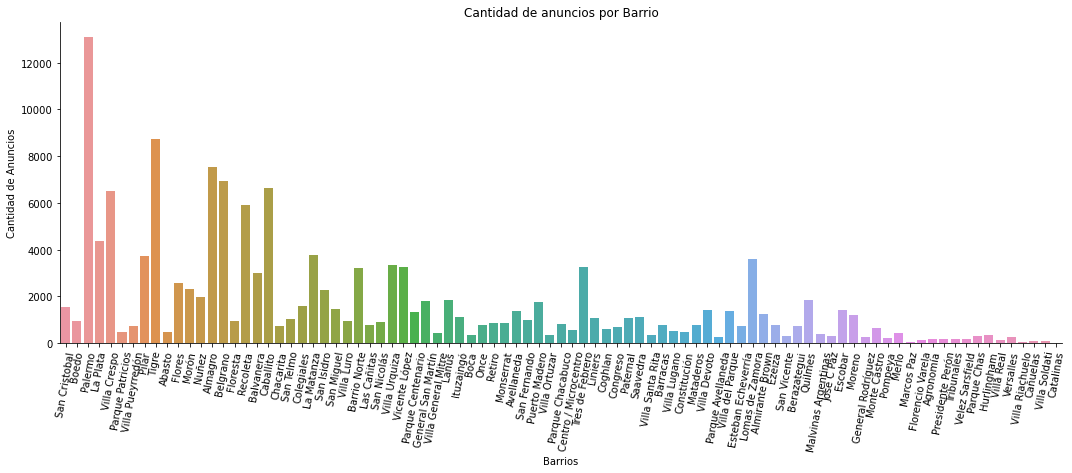

In [14]:
ax1=sns.catplot(data=df_propiedades, x='Zona', kind='count', aspect=3)
plt.title('Cantidad de anuncios por Provincia')      
plt.xlabel('Provincias')  
plt.ylabel('Cantidad de Anuncios')  
plt.xticks(rotation=45)
plt.show()

##############
ax2=sns.catplot(data=df_propiedades, x='Barrio', kind='count', aspect=3)
plt.title('Cantidad de anuncios por Barrio')      
plt.xlabel('Barrios')  
plt.ylabel('Cantidad de Anuncios')  
plt.xticks(rotation=80)
plt.show()


### En el primer grafico podemos observar que en Capital Federal hay mas de 80000 inmuebles, mientras que las demas zonas no superan los 40000 inmuebles
### En el segundo grafico se puede observar que los barrios con mas cantidad de inmuebles son Palermo, Tigre y Almagro

## Agrupamos por tipo de propiedad

In [15]:
datatipo = df_propiedades.groupby('property_type')['property_type'].count()
print(datatipo)

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
Name: property_type, dtype: int64


## Grafico de barras

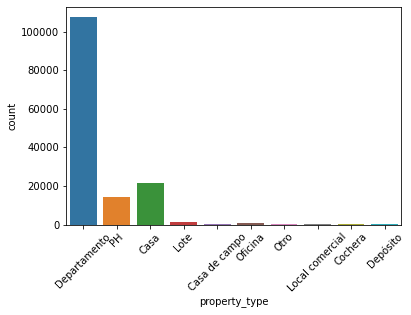

In [16]:
h= sns.countplot(x='property_type',data=df_propiedades)
labels=h.get_xticklabels()
_=h.set_xticklabels(labels,rotation=45)

### Se puede observar que hay mas de 100000 Departamentos, luego Casas y PH rondan los 20000. De los demas tipos hay pocos inmuebles

## Vemos datos estadisticos relevantes

In [17]:
df_propiedades.describe() 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,index
count,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05,146660.000000
mean,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05,73329.500000
std,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05,42337.239577
min,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,0.000000
25%,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05,36664.750000
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,73329.500000
75%,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05,109994.250000
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07,146659.000000


## Vemos la media de precio

In [18]:
df_propiedades["price"] = df_propiedades["price"].replace(".",",")
media_price = df_propiedades["price"].mean()
print(media_price)

241221.08019909996


## Graficamos el histograma de Price para ver su distribucion
### Como habian valores extremos, creamos una mascara para quitarlos y asi poder graficar correctamente la distribucion

In [19]:
data=df_propiedades[(df_propiedades.price<500000)]

Text(0, 0.5, 'Frecuencia')

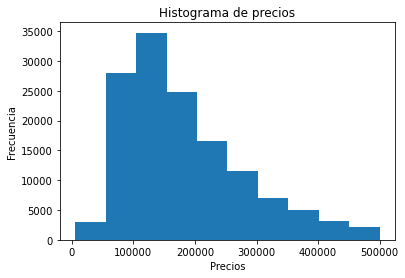

In [20]:
plt.hist(x=data["price"])
plt.title('Histograma de precios')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')


### Se puede observar que las frecuencias de precios mas altas estan entre 10000 y 20000 y tiende a una distribucion normal, aunque se observa que baja hacia la derecha

## Creamos un rango de precios
### <60000
### 60000-150000
### 150000-300000
### > 300000

In [21]:
rango_precio = [(df_propiedades["price"]<60000),(df_propiedades["price"]<150000),(df_propiedades["price"]<300000),(df_propiedades["price"]<100000000)]
values = ["Bajo","Medio","Medio Alto", "Alto"]
df_propiedades["rango"] = np.select(rango_precio,values)

In [22]:
data_rango = df_propiedades.groupby(["rango"])["price"].count()
print(data_rango)

rango
Alto          28868
Bajo           4487
Medio         58594
Medio Alto    54711
Name: price, dtype: int64


## Graficamos por rango 


<AxesSubplot:xlabel='rango', ylabel='count'>

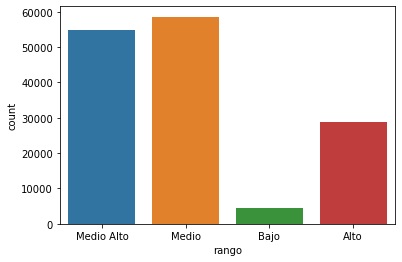

In [23]:
sns.countplot(data = df_propiedades, x = "rango")

### Se puede observar que la mayor cantidad de inmuebles estan en los rangos "Medio Alto" y "Medio" entre 50000 y 60000. Se puede destacar que el rango "Bajo" contiene muy pocos inmuebles en relacion a los demas rangos

## Vemos el rango por Zona y por Tipo de propiedad

In [24]:
rango_zona = pd.crosstab(index=df_propiedades['Zona'],
            columns=df_propiedades['rango'], margins=True)
print(rango_zona)

rango                      Alto  Bajo  Medio  Medio Alto     All
Zona                                                            
Bs.As. G.B.A. Zona Norte   5345   754   7969       10214   24282
Bs.As. G.B.A. Zona Oeste   1075  1119   7342        3130   12666
Bs.As. G.B.A. Zona Sur     2428  1321   8645        4779   17173
Capital Federal           20020  1293  34638       36588   92539
All                       28868  4487  58594       54711  146660


## Grafico rango por zona

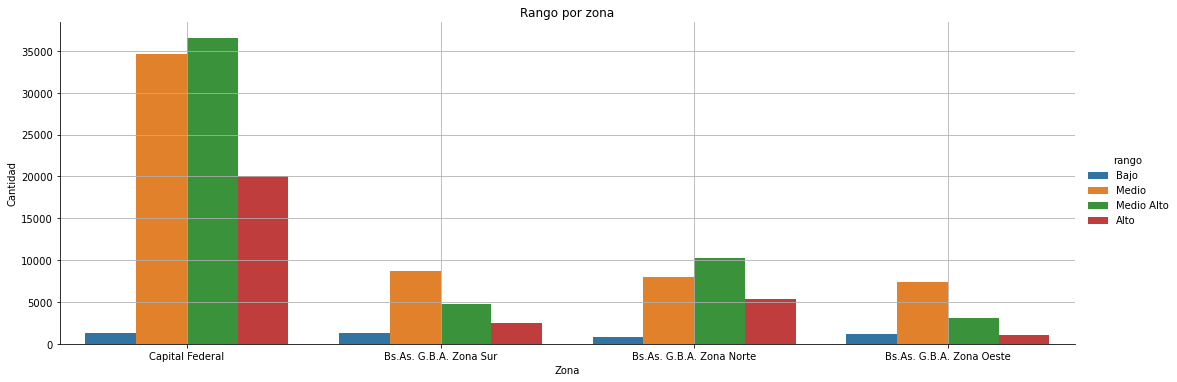

In [25]:
sns.catplot(data=df_propiedades, x='Zona', hue='rango', hue_order=values, kind='count', aspect=3)
plt.xlabel("Zona")
plt.ylabel("Cantidad")
plt.title("Rango por zona")
plt.grid()
plt.show()

### Se puede observar que la mayor cantidad de inmuebles en las cuatro zonas estan en "Medio Alto" y "Medio" pero que en Zona Norte es donde hay mas inmuebles de rango "Alto" con respecto al total en esa zona

## Vemos el rango por tipo de propiedad

In [26]:
pd.crosstab(index=df_propiedades['property_type'],
            columns=df_propiedades['rango'], margins=True)

rango,Alto,Bajo,Medio,Medio Alto,All
property_type,,,,,
Casa,6366,496,6116,8543,21521
Casa de campo,53,3,111,155,322
Cochera,0,253,4,2,259
Departamento,19632,2792,45696,39206,107326
Depósito,168,1,20,76,265
Local comercial,123,27,97,78,325
Lote,428,293,292,299,1312
Oficina,71,71,242,274,658
Otro,171,14,74,115,374


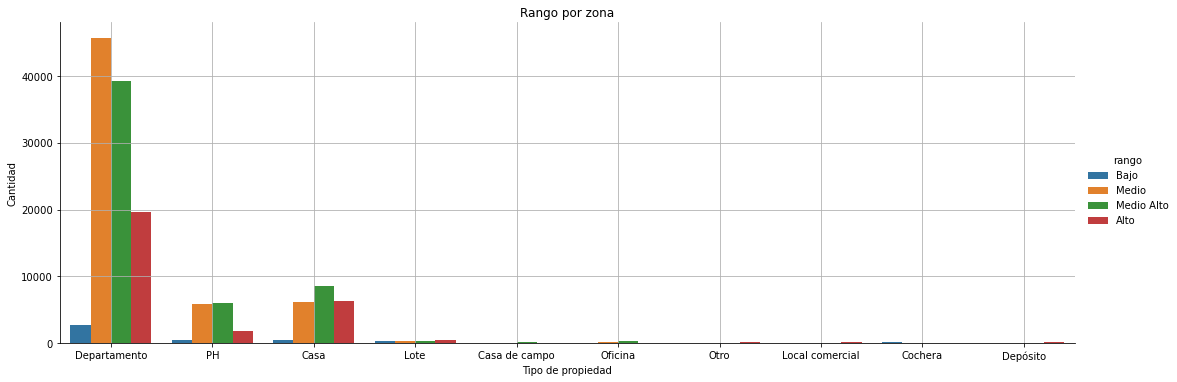

In [27]:
sns.catplot(data=df_propiedades, x='property_type', hue='rango', hue_order=values, kind='count', aspect=3)
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad")
plt.title("Rango por zona")
plt.grid()
plt.show()

### Se puede observar que en el tipo Departamento hay muchos inmuebles en el rango "Medio Alto" y "Medio" con respecto a los demas rangos, mientas que en el tipo Casa se encuentran una buena cantidad de inmuebles en rango "Alto" tambien

## Filtramos el Dataset
### En base al analisis anterior, se ve que hay que filtrar el dataset ya que algunos datos no nos dicen cosas que creemos relevantes
### Veremos los primeros tres tipos de propiedad y en la zona de Capital Federal

In [29]:
datasetfiltrado1 =df_propiedades.loc[df_propiedades["property_type"].isin(["Departamento","PH","Casa"])]

In [30]:
dataset_filtrado =datasetfiltrado1.loc[datasetfiltrado1["Zona"].isin(["Capital Federal"])]

## Vemos la nueva forma del dataset (filtrado)

In [31]:
dataset_filtrado.shape   

(91485, 18)

## Filtramos las instancias donde superficie cubierta es mayor a superficie total

In [32]:
dataset_filtrado=dataset_filtrado[(dataset_filtrado.surface_total>dataset_filtrado.surface_covered)]

In [33]:
dataset_filtrado.shape

(56658, 18)

## Vemos la distribucion de variables

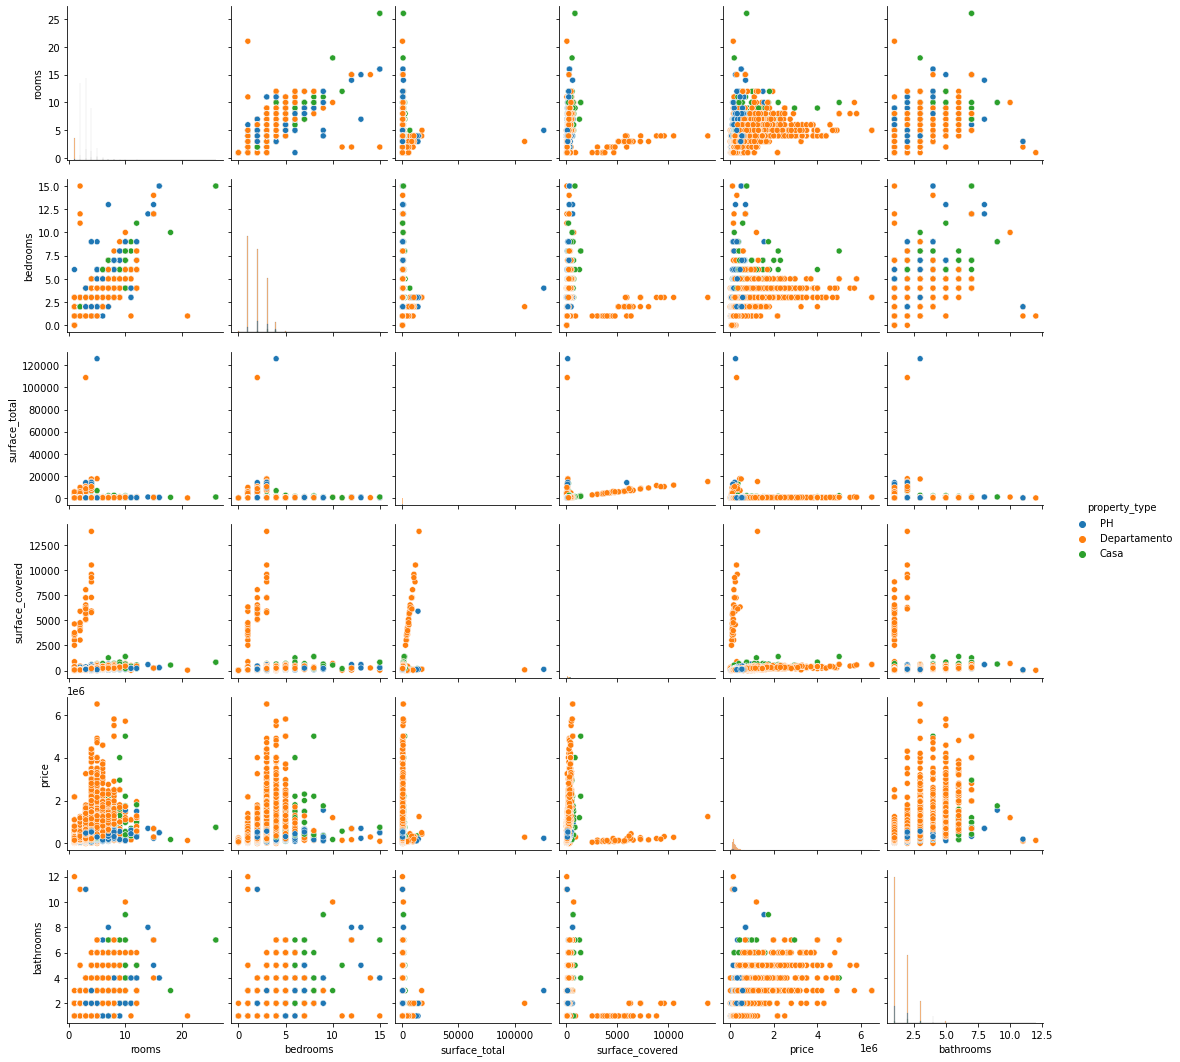

In [34]:
pairplot(dataset_filtrado,x_vars=["rooms", "bedrooms", "surface_total","surface_covered","price","bathrooms"],
    y_vars=["rooms", "bedrooms", "surface_total","surface_covered","price","bathrooms"],  hue = 'property_type',diag_kind="hist")

### Aqui podemos ver algunas relaciones, por ejemplo tendiente a lineal entre rooms y bedrooms, y que hay valores extremos que nos afectan los graficos, por ejemplo surface total. Esto nos dificulta el analisis por lo que se procedera a realizar un tratamiento para mejorar

## Vemos valores extremos

### Surface total

<AxesSubplot:>

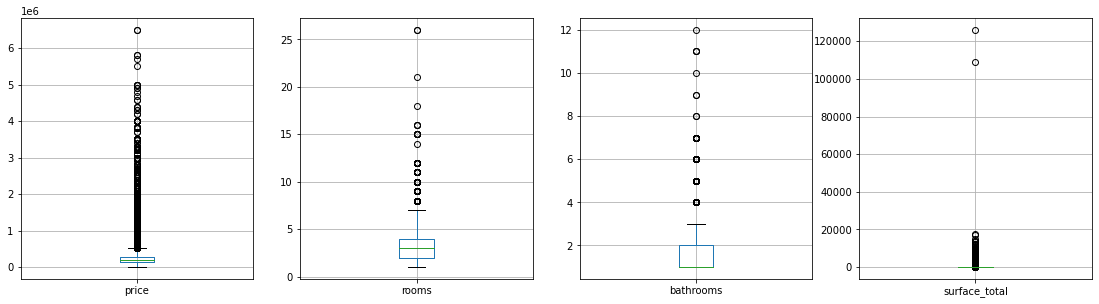

In [34]:
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,4,1)
dataset_filtrado.boxplot("price")

plt.subplot(1,4,2)
dataset_filtrado.boxplot("rooms")

plt.subplot(1,4,3)
dataset_filtrado.boxplot("bathrooms")

plt.subplot(1,4,4)
dataset_filtrado.boxplot("surface_total")

### Podemos observar que en price tenemos muchos valores fuera de la caja
### Podemos observar que en rooms hay valores extremos, no una gran cantidad
### Podemos observar que en bathrooms hay valores extremos de manera uniforme
### Podemos observar que en surface_total tenemos valores muy extremos con respecto a su media

## Filtramos valores extremos de surface total, price, rooms y bathrooms

In [35]:
dataset_filtrado=dataset_filtrado[(dataset_filtrado.surface_total <800)]
dataset_filtrado=dataset_filtrado[(dataset_filtrado.surface_total >15)]
dataset_filtrado=dataset_filtrado[(dataset_filtrado.price <500000)]
dataset_filtrado=dataset_filtrado[(dataset_filtrado.rooms <10)]
dataset_filtrado=dataset_filtrado[(dataset_filtrado.bathrooms <8)]

## Vemos como nos queda el dataset filtrado

In [36]:
dataset_filtrado.shape

(51127, 18)

## Vemos como quedaron los graficos de caja de surface total, price, rooms y bathrooms

<AxesSubplot:>

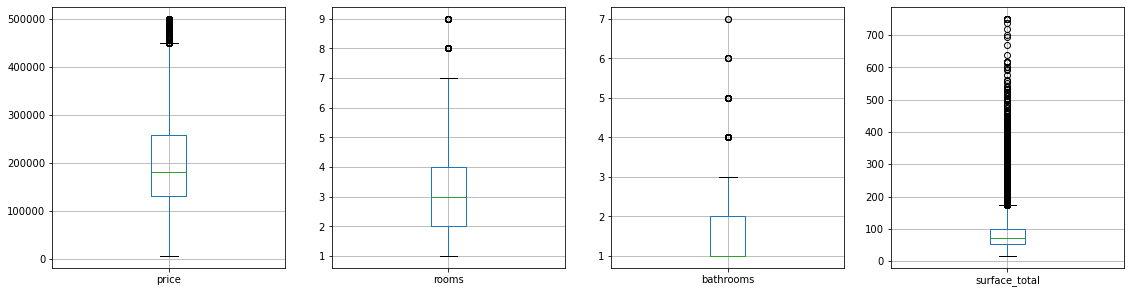

In [37]:
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,4,1)
dataset_filtrado.boxplot("price")

plt.subplot(1,4,2)
dataset_filtrado.boxplot("rooms")

plt.subplot(1,4,3)
dataset_filtrado.boxplot("bathrooms")

plt.subplot(1,4,4)
dataset_filtrado.boxplot("surface_total")



### Aqui podemos observar como mejoraron los graficos de caja al eliminar valores extremos

## Vemos las relaciones entre columnas

In [38]:
corr_final =dataset_filtrado.corr()

## Heatmap 

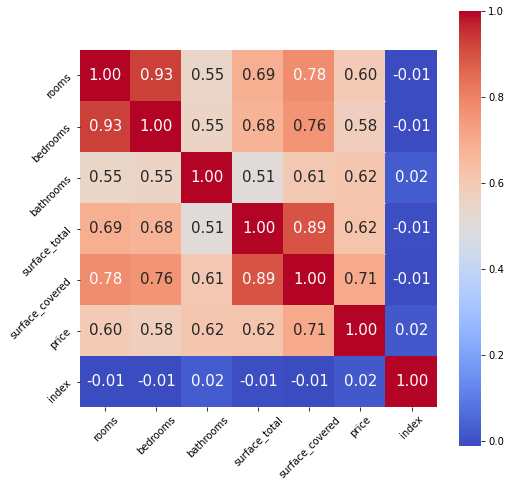

In [39]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr_final, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


### Aqui podemos observar que mejoraron los coeficientes de correlacion con respecto al dataset antes del filtrado, mejoraron los coeficientes de superficie

## Agrupo cantidades por barrio y lo ordeno de mayor a menor

In [40]:
barrio = dataset_filtrado.groupby('Barrio')['index'].count()
barrio = barrio.sort_values(ascending=False)
barrio.head()

Barrio
Palermo         7336
Almagro         4727
Villa Crespo    4088
Caballito       3867
Belgrano        3594
Name: index, dtype: int64

## Definimos rangos para el dataset filtrado y armamos una tabla para ver esos valores por barrio

In [41]:
rango_precio_dataset = [(dataset_filtrado["price"]<60000),(dataset_filtrado["price"]<150000),(dataset_filtrado["price"]<300000),(dataset_filtrado["price"]<100000000)]
values = ["Bajo","Medio","Medio Alto", "Alto"]
dataset_filtrado["rango"] = np.select(rango_precio_dataset,values)

In [42]:
barrio_precio = pd.crosstab(index=dataset_filtrado['Barrio'],
            columns=dataset_filtrado['rango'], margins=True)

## Ordeno barrios por cantidad de propiedades en rango ALTO

In [43]:
barrio_precio = barrio_precio.sort_values(["Alto"],ascending=False)
barrio_precio.head()

rango,Alto,Bajo,Medio,Medio Alto,All
Barrio,,,,,
All,8338,250,17573,24966,51127
Palermo,1599,2,1418,4317,7336
Belgrano,1136,1,627,1830,3594
Recoleta,917,2,347,1112,2378
Caballito,726,16,1186,1939,3867


In [44]:
dataset_filtrado.shape

(51127, 18)

## Eliminamos los vacios

In [45]:
dataset_filtrado = dataset_filtrado.dropna()

## Destacar que queda igual luego de eliminar los vacios

In [47]:
dataset_filtrado.shape

(51127, 18)

## Graficamos ahora las distribuciones

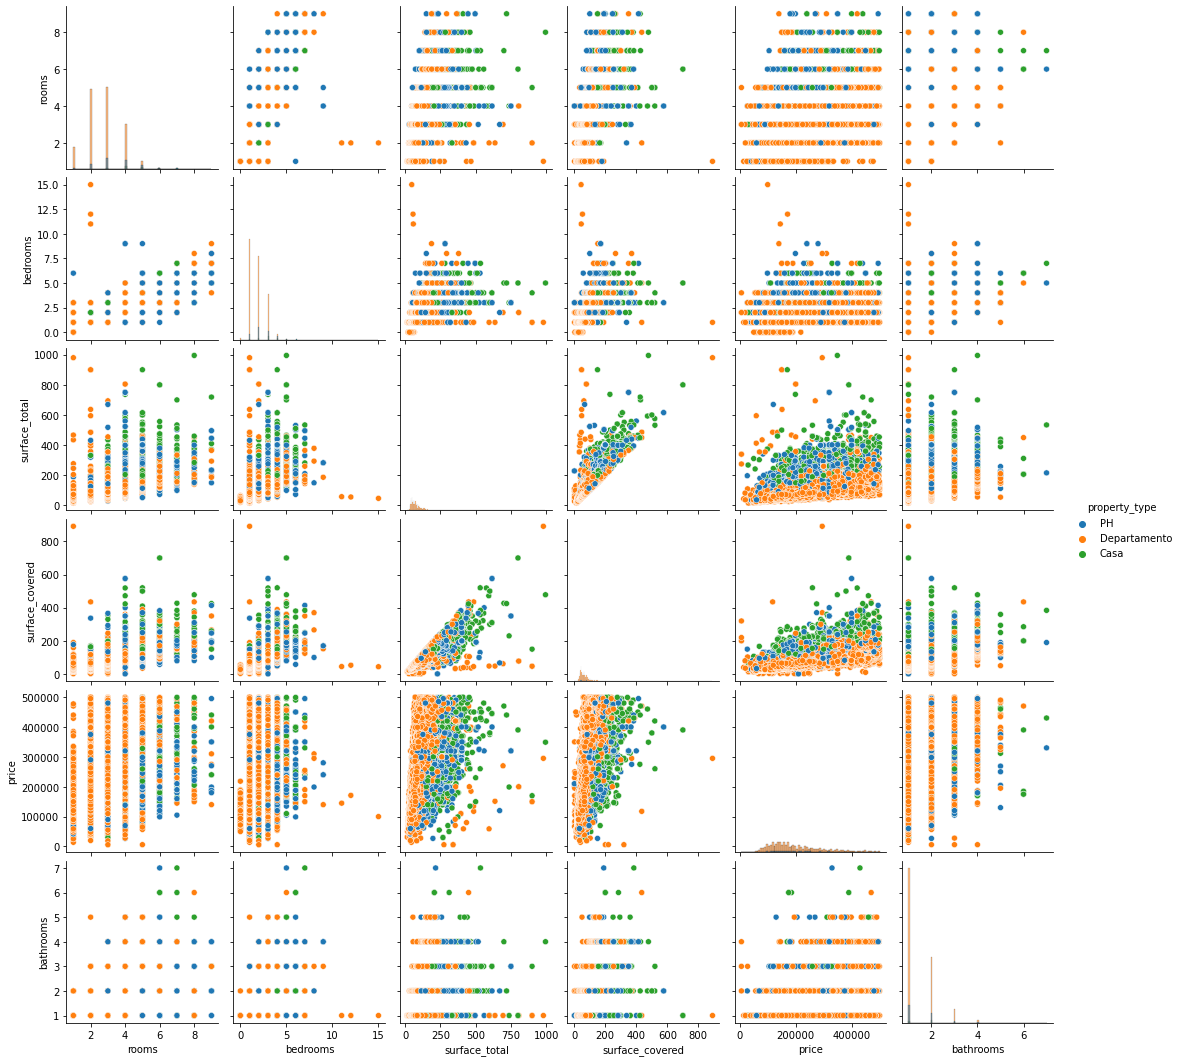

In [59]:
sns.pairplot(dataset_filtrado,x_vars=["rooms", "bedrooms", "surface_total","surface_covered","price","bathrooms"],
    y_vars=["rooms", "bedrooms", "surface_total","surface_covered","price","bathrooms"],  hue = 'property_type',diag_kind="hist")

### Luego del tratamiento que realizamos, podemos ver nuevamente las distribuciones e interpretarlas de una mejor manera, por ejemplo los graficos de superficie ya no tienen los valores extremos que nos dificultaba el analisis

# Machine learning

### Procederemos a realizar el modelo de Machine Learning
### Las metricas elegidas para medir el modelo son Raíz del error cuadrático medio y R2 ya que tenemos regresiones y creo conveniente enfocarse en los errores del modelo. Tambien que la RSME es sensible a valores atipicos, los cuales se han intentado eliminar durante el analisis exploratorio
### Nos interesa que en la primera metrica el resultado sea lo mas bajo posible ya que son errores, mientras que en la segunda nos interesa que se acerque a uno, ya que es un porcentaje

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [49]:
dataset_filtrado.columns

Index(['start_date', 'end_date', 'created_on', 'Zona', 'Barrio', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'title', 'description', 'property_type', 'operation_type',
       'index', 'rango'],
      dtype='object')

## Definimos las variables X e Y

In [50]:
X = dataset_filtrado[["bathrooms","surface_covered","surface_total","bedrooms"]]
y = dataset_filtrado["price"]

## Dividimos el dataset en train y test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Vemos el tamano

In [52]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35788, 4) (35788,) (15339, 4) (15339,)


In [65]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=18, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=7)

## Lo entrenamos

In [66]:
linear_model.fit(X_train , y_train)
tree_regressor.fit(X_train , y_train)
knn_regressor.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=7)

## Vemos metrica RSME y graficos

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 64002.86483684801
Raíz del error cuadrático medio en Test: 65229.253408901626


C:\Users\Lucas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


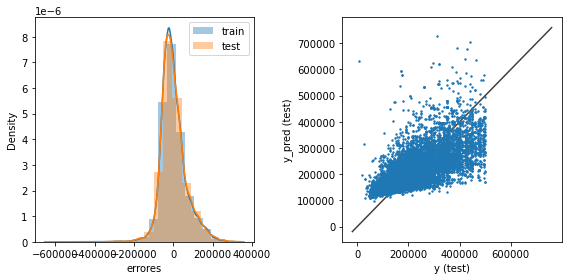

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 34659.21169744209
Raíz del error cuadrático medio en Test: 53266.29137903109


C:\Users\Lucas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


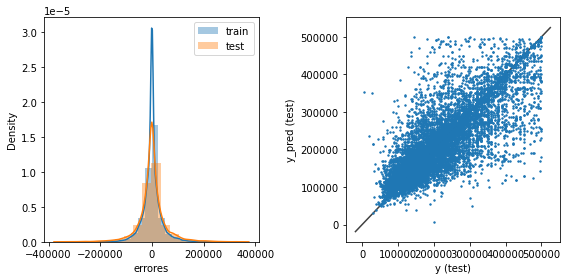

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 46830.376205995104
Raíz del error cuadrático medio en Test: 53674.902554416825


C:\Users\Lucas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lucas\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


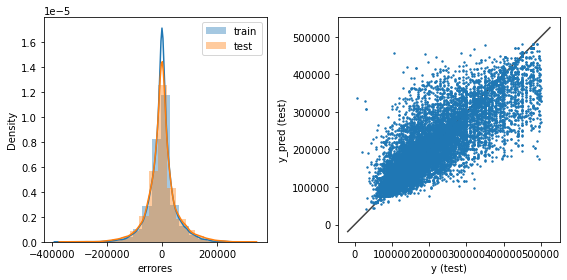

In [67]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Vemos los errores para optimizar depth y numero de vecinos

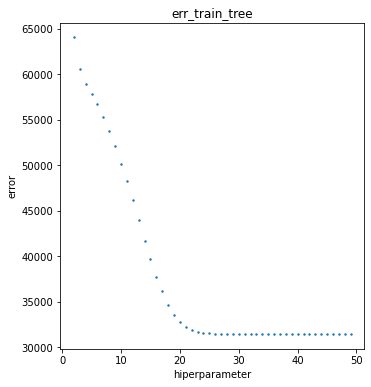

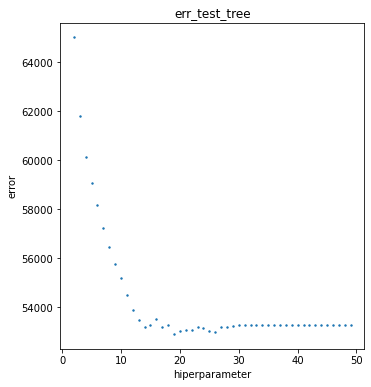

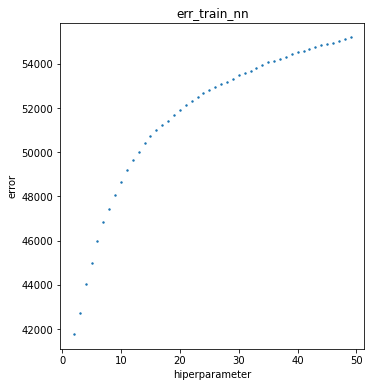

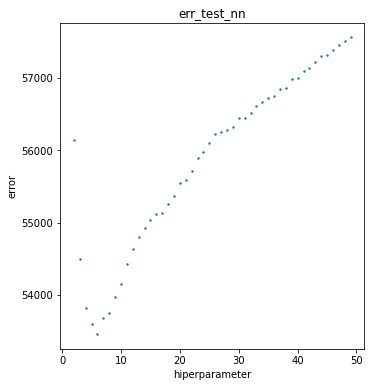

In [68]:
err_train_tree = []
err_train_nn = []
err_test_tree = []
err_test_nn = []
idx= [range(2,50,1)]
for i in range(2,50,1):
  tree_regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
  knn_regressor = KNeighborsRegressor(n_neighbors=i,)

  tree_regressor.fit(X_train, y_train)
  knn_regressor.fit(X_train, y_train)

  y_train_pred_tree = tree_regressor.predict(X_train)
  y_test_pred_tree = tree_regressor.predict(X_test)

  y_train_pred_nn = knn_regressor.predict(X_train)
  y_test_pred_nn = knn_regressor.predict(X_test)

  rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
  rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

  rmse_train_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
  rmse_test_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))

  err_train_tree.append(rmse_train_tree)
  err_train_nn.append(rmse_train_nn)
  err_test_tree.append(rmse_test_tree)
  err_test_nn.append(rmse_test_nn)

def plot_err(err,idx,titulo):
  plt.figure(figsize = (12,6))
  ax = plt.subplot(1,2,2)
  ax.scatter(idx,err, s =2)
  plt.xlabel('hiperparameter')
  plt.ylabel('error')
  plt.title(titulo)
      
  #plt1.tight_layout()
  plt.show()

plot_err(err_train_tree,idx,'err_train_tree')
plot_err(err_test_tree,idx,'err_test_tree')
plot_err(err_train_nn,idx, 'err_train_nn')
plot_err(err_test_nn,idx,'err_test_nn')


### Luego de analizar estos graficos, se decide dejar como hiperparametros: max_depth = 18, n_neighbors=7 ya que son los optimos

## Vemos el R2 de arbol de decision

In [69]:
from sklearn.metrics import r2_score

In [70]:
y_train_pred = tree_regressor.predict(X_train)
r2_arbol =r2_score(y_test, y_test_pred)

In [71]:
print("El R2 del modelo arbol de decision es: ",r2_arbol)

El R2 del modelo arbol de decision es:  0.6907814601107497


## Vemos el R2 de KNN

In [72]:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)
r2_knn =r2_score(y_test, y_test_pred_knn)

In [73]:
print("El R2 del modelo arbol de decision es: ",r2_knn)

El R2 del modelo arbol de decision es:  0.6444209999995021


### Despues de optimizar los modelos, se determina que el mejor en este caso es el de Arbol de decision, ya que cumple mejor con las metricas definidas, el RSME es muy similar al modelo de KNN pero el R2 es un 5% mas alto aproximadamente

## Practicamos ingresar una nueva instancia

In [74]:
nuevo = [[2,60,80,3]]

In [75]:
prediccion = tree_regressor.predict(nuevo)

In [76]:
print("El valor del inmueble es: ",prediccion)

El valor del inmueble es:  [199666.66666667]


### Como conclusion luego de probar y evaluar los modelos, podria mejorarse el filtrado, buscar alguna forma de quedar con mas cantidad de instancias, ya que se eliminaron muchas, analizar y mejorar en el modelo de arbol de decision que hay bastante diferencia entre el RSME del conjunto de entramiento con el de testeo, esto puede derivar en un sobre entrenamiento. Tambien intentar mejorar el R2, que llegue a un % mas alto